In [1]:
import joblib
import scipy
from assocplots.qqplot import *
# from qmplot import qqplot
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
import os
import pandas as pd
import random

In [2]:
def read_pval(path):
    pvals = []
    pvals_perm = []
    skats = []
    genes = []
    starts = []
    ends = []
    with open(path, 'rb') as f:
        data = joblib.load(f)
        for j, d in enumerate(data):
            if d[0] == None:
                continue
            # pvals.append(d[0])
            # pvals_perm.append(d[1])
            starts.append(d[1])
            ends.append(d[2])
            genes.append(d[-3])
            skats.append(d[-2])

    return skats,genes,starts,ends

def flatten_perm(pairs):
    N = len(pairs) # N is the number of hyperparamter
    M = len(pairs[0]) # M is the number of windows tested
    # print(pairs)
    p_all = []
    for n in range(N):
        p_row = []
        for m in range(1,M):
            p_row.append(pairs[n][m])
        p_all.append(p_row)
    p_all = np.array(p_all)
    p_min = np.amin(p_all,axis=0)
    return list(p_min[:10])

def flatten_p(pairs,complete=False):
    N = len(pairs) # N is the number of hyperparamter
    M = len(pairs[0]) # M is the number of permutations
    p_all = []
    for n in range(N):
        p_row = []
        for m in range(1):
            p_row.append(pairs[n][m])
        p_all.append(p_row)
    p_all = np.array(p_all).flatten()
    p_min = np.amin(p_all)
    bindex = np.argmin(p_all)
    if complete:
        return (p_all,bindex)
    else:
        return (p_min,bindex)

In [2]:
def read_pval(path):
    pvals = []
    pvals_perm = []
    genes = []
    with open(path, 'rb') as f:
        data = joblib.load(f)
        for j, d in enumerate(data):
            if d[0] == None:
                continue
            pvals.append(d[0])
            pvals_perm.append(d[1])
            genes.append(d[-4])

    return pvals,pvals_perm,genes

In [13]:
directory = '/u/scratch/p/panand2/tensorsketch_d2_c0_genes_all_gammas_precision_e-6_correct/'

pvals = []
pvals_perm = []
allgenes = []
allstarts = []
allends = []
z = 1
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)   
    if os.path.isfile(f):
        skats,genes,starts,ends = read_pval(f)
        allgenes.append(genes)
        allstarts.append(starts)
        allends.append(ends)
        addMore = False
        if (len(genes) != 50 and '28.pkl' not in filename):
            addMore = True
        for arr3 in skats:
            for i in np.arange(0, 100):
                phen = []
                for gamma in arr3:
                    phen.append(gamma[i])
                (pval,bindex), p_perm = flatten_p(phen),flatten_perm(phen)
                pvals.append(pval)
                pvals_perm.append(p_perm)
        if addMore:
            pvals = list(np.concatenate((pvals, np.full((50 - len(genes)) * 100, 5))))
            allgenes.append(np.full(50 - len(genes), "FILLER"))
            allstarts.append(np.full(50 - len(genes), 0))
            allends.append(np.full(50 - len(genes), 0))
    z += 1
                  
pvals_perm = np.array(pvals_perm).flatten()
print(len(pvals))
print(len(pvals_perm))
print(len(allgenes))

1002800
10012000
205


In [6]:
concat3 = []
for start in allstarts:
    concat3 = np.concatenate((concat3, start))

mul3 = []
for start in concat3:
    for i in range(100):
        mul3 += [start]

concat4 = []
for end in allends:
    concat4 = np.concatenate((concat4, end))

mul4 = []
for end in concat4:
    for i in range(100):
        mul4 += [end]

print(len(concat3))
print(len(concat4))
print(len(mul3))
print(len(mul4))

10028
10028
1002800
1002800


In [12]:
directory = '/u/scratch/p/panand2/tensorsketch_d2_c0_genes_all_gammas_precision_e-6_correct_2/'

pvals2 = []
pvals_perm2 = []
allgenes2 = []
allstarts2 = []
allends2 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        skats,genes,starts,ends = read_pval(f)
        allgenes2.append(genes)
        allstarts2.append(starts)
        allends2.append(ends)
        addMore = False
        if (len(genes) != 50 and '28.pkl' not in filename):
            addMore = True
        for arr3 in skats:
            for i in np.arange(0, 100):
                phen = []
                for gamma in arr3:
                    phen.append(gamma[i])
                (pval,bindex), p_perm = flatten_p(phen),flatten_perm(phen)
                pvals2.append(pval)
                pvals_perm2.append(p_perm)
        if addMore:
            pvals2 = list(np.concatenate((pvals2, np.full((50 - len(genes)) * 100, 5))))
            allgenes2.append(np.full(50 - len(genes), "FILLER"))
            allstarts2.append(np.full(50 - len(genes), 0))
            allends2.append(np.full(50 - len(genes), 0))
                  
pvals_perm2 = np.array(pvals_perm2).flatten()
print(len(pvals2))
print(len(pvals_perm2))
print(len(allgenes2))

1007800
10055000
207


In [4]:
concat5 = []
for start in allstarts2:
    concat5 = np.concatenate((concat5, start))

mul5 = []
for start in concat5:
    for i in range(100):
        mul5 += [start]

concat6 = []
for end in allends2:
    concat6 = np.concatenate((concat6, end))

mul6 = []
for end in concat6:
    for i in range(100):
        mul6 += [end]

print(len(concat5))
print(len(concat6))
print(len(mul5))
print(len(mul6))

10078
10078
1007800
1007800


In [7]:
concat = []
for g in allgenes:
    concat = np.concatenate((concat, g))
    
mul = []
for gene in concat:
    for i in range(100):
        mul += [gene]

concat2 = []
for g in allgenes2:
    concat2 = np.concatenate((concat2, g))
    
mul2 = []
for gene in concat2:
    for i in range(100):
        mul2 += [gene]

print(len(concat))
print(len(mul))
print(len(concat2))
print(len(mul2))

10028
1002800
10078
1007800


In [8]:
info_array = pd.read_csv('../genes_info_array')
genes = info_array.iloc[:,0].values
print(genes)

print(len(concat))
notin = []
for gene in genes:
    if (gene not in concat):
        notin.append(gene)

print(len(notin))

['SAMD11' 'NOC2L' 'AGRN' ... 'PNPLA7' 'WDR85' 'EHMT1']
10028
66


9817
9346
442
981700
981700
9


(0.0, 13.0)

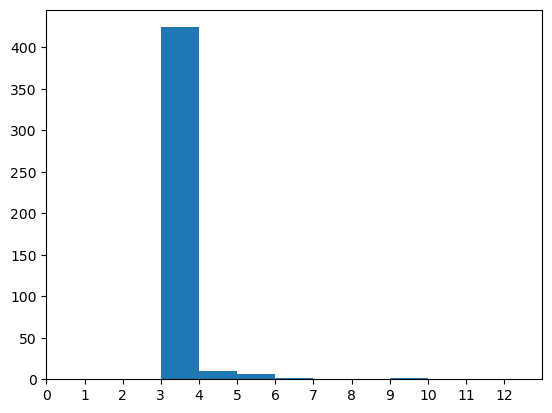

In [27]:
directory = "/u/scratch/p/panand2/direct_genes_precision_nosqrt2_e-6_fastlmm"

pvals1 = []
pvals2 = []
genes = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        p1,p2,g = read_pval(f)
        for pval in p1:
            pvals1.append(pval)
        for pval in p2:
            pvals2.append(pval)
        for gene in g:
            genes.append(gene)

print(len(genes))
info_array = pd.read_csv('../genes_info_array')
keep = []
for i in range(len(genes)):
    if info_array.loc[info_array['gene'] == genes[i], '#SNPs'].values[0] <= 55:
        keep.append(i)
print(len(keep))

idx = []
i = 0
for i in range(len(pvals1)):
    if pvals1[i][0] == 2:
        idx.append(i)
    i += 1

pvals1 = np.array(pvals1).flatten()
pvals2 = np.array(pvals2).flatten()
genes = np.array(genes)
genes = genes[idx]

print(len(genes))

lens = []

for gene in genes:
    lens.append(info_array.loc[info_array['gene'] == gene, '#SNPs'].values[0])


# pvals = np.loadtxt('/u/scratch/p/panand2/precision_genes_all_gammas_e-6_fastlmm.txt')
# pvals = [i for i in pvals if i != 5]
print(len(pvals1))
# pvals2 = np.loadtxt('/u/scratch/p/panand2/precision_genes_all_gammas_e-6_fastlmm_2.txt')
# pvals2 = [i for i in pvals2 if i != 5]
print(len(pvals2))

print(np.max(lens))
plt.hist(lens, bins = np.arange(0, 13))
plt.xticks(np.arange(0, 13))
plt.xlim(0, 13)
# pvals = np.concatenate((pvals, pvals2))
# print(len(pvals))

9764
9298
1728
976400
976400
9


(0.0, 13.0)

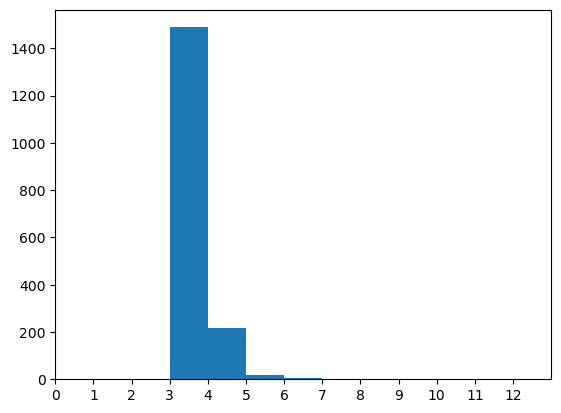

In [21]:
directory = "/u/scratch/p/panand2/direct_genes_precision_nosqrt2_e-6_fastlmm_2"

pvals3 = []
pvals4 = []
genes = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        p1,p2,g = read_pval(f)
        for pval in p1:
            pvals3.append(pval)
        for pval in p2:
            pvals4.append(pval)
        for gene in g:
            genes.append(gene)

print(len(genes))
info_array = pd.read_csv('../genes_info_array')
keep = []
for i in range(len(genes)):
    if info_array.loc[info_array['gene'] == genes[i], '#SNPs'].values[0] <= 55:
        keep.append(i)
print(len(keep))

idx = []
i = 0
for i in range(len(pvals3)):
    if pvals3[i][0] == 2:
        idx.append(i)
    i += 1

pvals3 = np.array(pvals3).flatten()
pvals4 = np.array(pvals4).flatten()
genes = np.array(genes)
genes = genes[idx]

print(len(genes))

lens = []
info_array = pd.read_csv('../genes_info_array')
for gene in genes:
    lens.append(info_array.loc[info_array['gene'] == gene, '#SNPs'].values[0])


# pvals = np.loadtxt('/u/scratch/p/panand2/precision_genes_all_gammas_e-6_fastlmm.txt')
# pvals = [i for i in pvals if i != 5]
print(len(pvals3))
# pvals2 = np.loadtxt('/u/scratch/p/panand2/precision_genes_all_gammas_e-6_fastlmm_2.txt')
# pvals2 = [i for i in pvals2 if i != 5]
print(len(pvals4))

print(np.max(lens))
plt.hist(lens, bins = np.arange(0, 13))
plt.xticks(np.arange(0, 13))
plt.xlim(0, 13)
# pvals = np.concatenate((pvals, pvals2))
# print(len(pvals))

In [15]:
pvals = np.array(pvals)
pvals2 = np.array(pvals2)

print(len(pvals))
idx = (pvals == 2).nonzero()[0]
print(idx)
print(len(idx))

print(len(pvals2))
idx2 = (pvals2 == 2).nonzero()[0]
print(idx2)
print(len(idx2))

idx_mod = np.zeros(len(idx))
idx_mod2 = np.zeros(len(idx2))

for i in range(len(idx)):
    num = idx[i]
    while num >= 5000:
        num -= 5000
    idx_mod[i] = num

for i in range(len(idx2)):
    num = idx2[i]
    while num >= 5000:
        num -= 5000
    idx_mod2[i] = num

print(idx_mod)
print(idx_mod2)

traits = [int(x%100) for x in idx_mod]
traits2 = [int(x%100) for x in idx_mod2]

print(traits)
print(traits2)

print(len(mul))
print(len(mul2))

genes = [mul[x] for x in idx]
genes2 = [mul2[x] for x in idx2]

# print(len(genes))
# print(len(np.unique(genes)))
# print(len(genes2))

# snpstart = []
# snpend = []
# for gene in genes:
#     snpstart.append(info_array.loc[info_array.gene==gene, 'Start'].values[0])
#     snpend.append(info_array.loc[info_array.gene==gene, 'End'].values[0])

# snplen = []
# for i in range(len(snpstart)):
#     snplen.append(snpend[i] - snpstart[i])

starts = [int(mul3[x]) for x in idx]
ends = [int(mul4[x]) for x in idx]

snpstart2 = []
snpend2 = []
for gene in genes2:
    snpstart2.append(info_array.loc[info_array.gene==gene, 'Start'].values[0])
    snpend2.append(info_array.loc[info_array.gene==gene, 'End'].values[0])

snplen2 = []
for i in range(len(snpstart2)):
    snplen2.append(snpend2[i] - snpstart2[i])

starts2 = [int(mul5[x]) for x in idx2]
ends2 = [int(mul6[x]) for x in idx2]

# d = {'Trait' : traits, 'Gene' : genes, 'pStart' : starts, 'pEnd' : ends, 'Start' : snpstart, 'End' : snpend, '#SNPs' : snplen, 'Pvalue' : np.ones(len(genes))}
# df = pd.DataFrame(data=d)
# df = df.sort_values('#SNPs')
# df.to_csv('ones_set_1.csv',index=False)

d = {'Trait' : traits2, 'Gene' : genes2, 'pStart' : starts2, 'pEnd' : ends2, 'Start' : snpstart2, 'End' : snpend2, '#SNPs' : snplen2, 'Pvalue' : np.ones(len(genes2))}
df = pd.DataFrame(data=d)
# df = df.sort_values('Gene')
df.to_csv('ones_set_2.csv',index=False)

1002800
[   1500    1501    1502 ... 1002297 1002298 1002299]
155575
1007800
[    100     101     102 ... 1004497 1004498 1004499]
155819
[1500. 1501. 1502. ... 2297. 2298. 2299.]
[ 100.  101.  102. ... 4497. 4498. 4499.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 9

1961200
1613833
1.0065691873495444


(array([162235., 162450., 161349., 161578., 161610., 160989., 161545.,
        161005., 160747., 160325.]),
 array([3.95185260e-07, 1.00000353e-01, 2.00000311e-01, 3.00000269e-01,
        4.00000227e-01, 5.00000185e-01, 6.00000143e-01, 7.00000101e-01,
        8.00000059e-01, 9.00000016e-01, 9.99999974e-01]),
 <BarContainer object of 10 artists>)

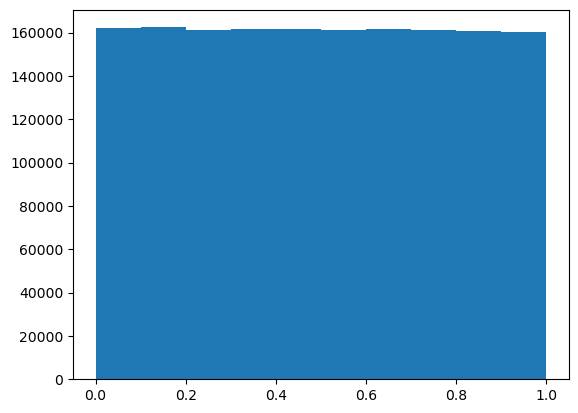

In [23]:
def lambda_gc(pvals):
    n = len(pvals)
    chisq = scipy.stats.chi2.ppf(1-pvals, 1)
    chisq_exp = scipy.stats.chi2.ppf(0.5, 1)
    return np.median(chisq)/chisq_exp

pvals1 = np.concatenate((pvals1, pvals3))
pvals1 = np.random.choice(pvals1, size=1961200, replace=False)
print(len(pvals1))

pvals1 = pvals1[pvals1 != 2]
pvals2 = pvals2[pvals2 != 2]
# pvals1[pvals1 <= 0] = 1e-13
# pvals2[pvals2 <= 0] = 1e-13
print(len(pvals1))
filtered_len = len(pvals1)
print(lambda_gc(pvals1))
plt.hist(pvals1)
# pvals = pvals2

In [6]:
fpr = []
fpr.append(len([i for i in pvals1 if i < 0.1])/len(pvals1))
fpr.append(len([i for i in pvals1 if i < 0.01])/len(pvals1))
fpr.append(len([i for i in pvals1 if i < 0.001])/len(pvals1))
fpr.append(len([i for i in pvals1 if i < 0.0001])/len(pvals1))
fpr.append(len([i for i in pvals1 if i < 0.00001])/len(pvals1))
fpr.append(len([i for i in pvals1 if i < 0.000001])/len(pvals1))

np.savetxt("../result_vals/fpr_direct_e-6.txt", np.array(fpr))

In [7]:
print(fpr)
pval_errors = []

i = 1
for val in fpr:
    thresh = 1.0 / np.power(10, i)
    num = np.abs(1.0 - (val * np.power(10, i))) * thresh
    denom = np.sqrt(thresh * (1-thresh) / filtered_len)
    error = num/denom
    print(error)
    pval = scipy.stats.norm.sf(abs(error))*2.0
    pval_errors.append(pval)

    i += 1

print(pval_errors)
    

[0.1004398063463495, 0.010097120563550282, 0.0009880288290790237, 0.00010200730073194244, 6.942905285420166e-06, 5.340696373400128e-07]
2.006047873082288
1.3356561010849781
0.51826865484252
0.2746851710674917
1.3228546293867371
0.637561796083373
[0.04485114056907964, 0.18166170412722615, 0.6042708395079128, 0.7835581248633665, 0.18588372592251268, 0.5237589713910212]


/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)


(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

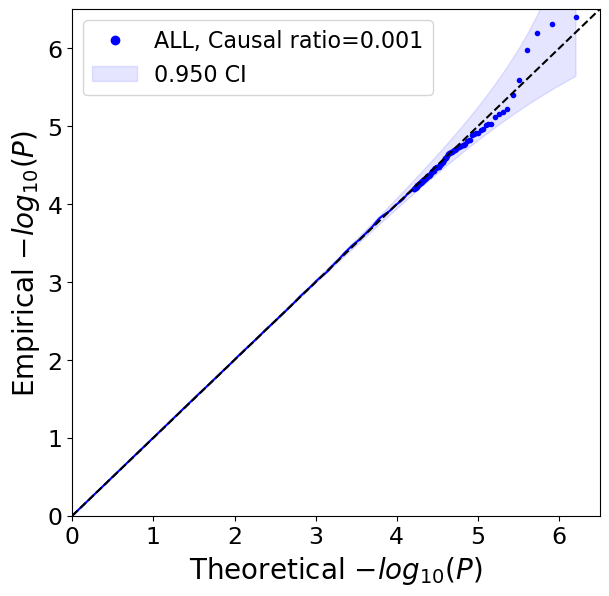

In [24]:
f, ax = plt.subplots(figsize=(6, 6), facecolor="w", edgecolor="k")
qqplot(
        [pvals1],
           labels=['ALL, Causal ratio=0.001'],
           color=['b'], 
           distribution='beta',
      )

plt.legend(prop={'size': 16},markerscale=2.)
plt.title("")
plt.ylabel(r"Empirical $-log_{10}{(P)}$", size = 20, )
plt.xlabel(r"Theoretical $-log_{10}{(P)}$", size = 20, )
plt.xlim(0, 6.5)
plt.ylim(0, 6.5)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

In [3]:
directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/direct_genes_nosqrt2/filter4_pheno_all_0.001"

pvals1  = []
pvals_perm1 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals1.append(pval)
        for pval in pvals_perm:
            pvals_perm1.append(pval)

pvals1 = np.array(pvals1)
pvals_perm1 = np.array(pvals_perm1).flatten()

print(len(pvals1))
# plt.hist(pvals1)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/direct_genes_nosqrt2/filter4_pheno_common_0.001"

pvals2  = []
pvals_perm2 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals2.append(pval)
        for pval in pvals_perm:
            pvals_perm2.append(pval)

pvals2 = np.array(pvals2)
pvals_perm2 = np.array(pvals_perm2).flatten()

print(len(pvals2))
# plt.hist(pvals2)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/direct_genes_nosqrt2/filter4_pheno_rare_0.001"

pvals3  = []
pvals_perm3 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals3.append(pval)
        for pval in pvals_perm:
            pvals_perm3.append(pval)

pvals3 = np.array(pvals3)
pvals_perm3 = np.array(pvals_perm3).flatten()

print(len(pvals3))
# plt.hist(pvals3)

directory = "/u/home/p/panand2/project-sriram/FastKAST/gen_architectures_calibration/direct_genes_nosqrt2/filter4_pheno_all_1"

pvals4  = []
pvals_perm4 = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pvals,pvals_perm,genes = read_pval(f)
        for pval in pvals:
            pvals4.append(pval)
        for pval in pvals_perm:
            pvals_perm4.append(pval)

pvals4 = np.array(pvals4)
pvals_perm4 = np.array(pvals_perm4).flatten()

print(len(pvals4))
# plt.hist(pvals4)

9991
9999
9983
10029


In [24]:
print(len(pvals1))
print(len(pvals_perm1))
print(len(pvals2))
print(len(pvals_perm2))
print(len(pvals3))
print(len(pvals_perm3))
print(len(pvals4))
print(len(pvals_perm4))

a1,b1,loc1,scale1 = beta.fit(pvals_perm1, loc=0,scale=1)
pvals_correct1 = beta.cdf(pvals1, a=a1, b=b1,loc=0, scale=1)

a1,b1,loc1,scale1 = beta.fit(pvals_perm2, loc=0,scale=1)
pvals_correct2 = beta.cdf(pvals2, a=a1, b=b1,loc=0, scale=1)

a1,b1,loc1,scale1 = beta.fit(pvals_perm3, loc=0,scale=1)
pvals_correct3 = beta.cdf(pvals3, a=a1, b=b1,loc=0, scale=1)

a1,b1,loc1,scale1 = beta.fit(pvals_perm4, loc=0,scale=1)
pvals_correct4 = beta.cdf(pvals4, a=a1, b=b1,loc=0, scale=1)

9659
9659
10037
10037
10037
10037
9709
9709


/u/home/p/panand2/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/u/home/p/panand2/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/u/home/p/panand2/.local/lib/python3.8/site-packages/assocplots/qqplot.py:78: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)

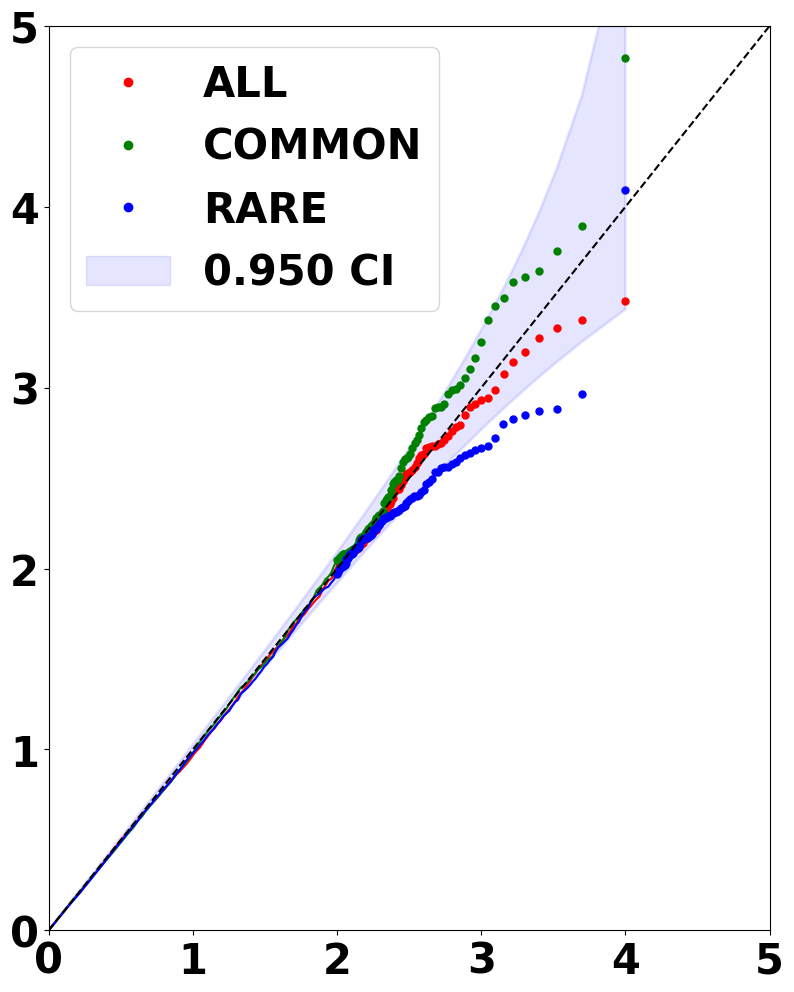

In [9]:
f, ax = plt.subplots(figsize=(8, 10), facecolor="w", edgecolor="k")
qqplot(
        [pvals1, pvals2, pvals3],
           labels=['ALL', 'COMMON', 'RARE'], 
           color=['r', 'g', 'b'],
           fill_dens=[0.1, 0.1, 0.1],
           distribution='beta',
      )

plt.legend(prop={'size': 30, 'weight': 750},markerscale=2.,loc='upper left')
plt.title("")
# plt.ylabel(r"Empirical $-log_{10}{(P)}$", size = 20, )
plt.ylabel("")
# plt.xlabel(r"Theoretical $-log_{10}{(P)}$", size = 20, )
plt.xlabel("")
plt.xlim(0, 5.0)
plt.ylim(0, 5.0)
plt.xticks(fontsize=30, weight=750)
plt.yticks(fontsize=30, weight=750)

# Make the dots thicker
for line in ax.lines:
    line.set_markersize(10)

# Make the lines thicker
for collection in ax.collections:
    collection.set_linewidth(2)

plt.show()

In [30]:
with open('/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps.sets.txt', 'w') as f:
    f.write('snp\tset\n')
    k = 1
    for i in np.arange(1, 101):
        for j in np.arange(k, k+100):
            f.write(str(j) + f"\tset_{i}\n")
        k += 100

In [31]:
plink_path="/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps"
test_snps_fn = plink_path
bim_df = pd.read_csv(f'{plink_path}.bim',delim_whitespace=True,header=None)
bim_df.columns=['CHR','SNP','x','BP','y','z']
fam_df = pd.read_csv(f'{plink_path}.fam',delim_whitespace=True,header=None)

y = np.random.randn(10000,1)
y_df = pd.DataFrame(data=np.concatenate((fam_df.iloc[:,0:1],fam_df.iloc[:,1:2],y),axis=1))
y_df.iloc[:, 0] = y_df.iloc[:, 0].astype(int)
y_df.iloc[:, 1] = y_df.iloc[:, 1].astype(int)
y_df.to_csv('/u/home/p/panand2/project-sriram/FastKAST/simulations/pheno_100_causals.txt', index=False, header=False, sep=' ')

/tmp/ipykernel_26045/534785150.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y_df.iloc[:, 0] = y_df.iloc[:, 0].astype(int)
/tmp/ipykernel_26045/534785150.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y_df.iloc[:, 1] = y_df.iloc[:, 1].astype(int)


In [1]:
# this will take a few minutes to run

# import the algorithm and reader
import datetime
import numpy as np
from fastlmm.association import snp_set
from pysnptools.snpreader import Bed
from fastlmm.util import example_file # Download and return local file name

# define file names
test_snps_fn = '/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps'
pheno_fn = "/u/home/p/panand2/project-sriram/FastKAST/simulations/pheno_100_causals.txt"
# cov_fn = example_file("tests/datasets/synth/cov.txt")
set_list_fn = "/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps.sets.txt"
G0_fn = None


# run SNP-set analysis
results_df = snp_set(test_snps=test_snps_fn, G0=G0_fn, set_list=set_list_fn, pheno=pheno_fn, test="sc_davies")

# qq plot
from fastlmm.util.stats import plotp

plotp.qqplot(results_df["P-value"].values, xlim=[0,5], ylim=[0,5], addlambda=False, legend="QQ")

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

last modified: Tue Jul 25 14:17:30 2023
-------------------------------------------------
distributable = FastLmmSet(
	altModel={'effect': 'mixed', 'link': 'linear'},
	alt_snpreader=Bed('/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps'),
	altset_list='/u/home/p/panand2/project-sriram/FastKAST/simulations/n10k_10k_0.04_snps.sets.txt',
	altset_list2=None,
	autoselect=False,
	cache_from_perm=False,
	calseed=None,
	covarfile=None,
	covarimp='standardize',
	datestamp=None,
	detailed_table=False,
	extractSim=None,
	filenull=None,
	fitlocal=False,
	forcefullrank=False,
	genphen=None,
	greater_is_better=None,
	idist=1,
	log=None,
	maxsetsize=None,
	mindist=0,
	minsetsize=None,
	mpheno=1,
	nlocalperm=None,
	nperm=10,
	npermabs=None,
	nullModel={'effect': 'fixed', 'link': 'linear'},
	nullfit='qq',
	nullfitfile=None,
	outfile='/tmp/tmpx1_5ilfg',
	permute=None,
	phenofile='/u/home/p/panand2/project-sriram/FastKAST/simulations/pheno_100_causals.txt',
	qmax=0.1,
	scoring=Non

ValueError: zero-size array to reduction operation minimum which has no identity